9/22/17

DLS Data processing


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy
import scipy.optimize

# Import the data as an array
dls_data = np.loadtxt("CorrelationDLS.asc", skiprows=27)

# First few rows include time, temp, etc. Not necessary
# dls_data is now an array of two colums: delay time tau and intensity autocorrelation g^2(tau)

In [2]:
# Unpack imported data
tau = dls_data[:,0]
intensity_ac = dls_data[:,1]

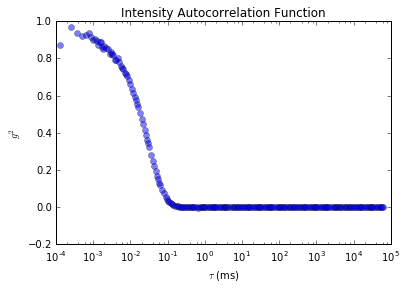

In [3]:
# Graph the tau vs. intensity autocorrelation function
# Plot tau on a log plot
plt.semilogx(tau, intensity_ac, 'bo', alpha = 0.5)
plt.title("Intensity Autocorrelation Function")
plt.xlabel(r'$\tau $ (ms)')
plt.ylabel(r'$g^2$')

('best-fit parameters: ', array([  3.32081257e+01,   9.23924098e-01,   6.28037432e-04]))
[[  3.81582365e-02   1.46351461e-04   2.85046362e-05]
 [  1.46351461e-04   2.72879940e-06  -2.93416572e-07]
 [  2.85046362e-05  -2.93416572e-07   3.46005727e-07]]


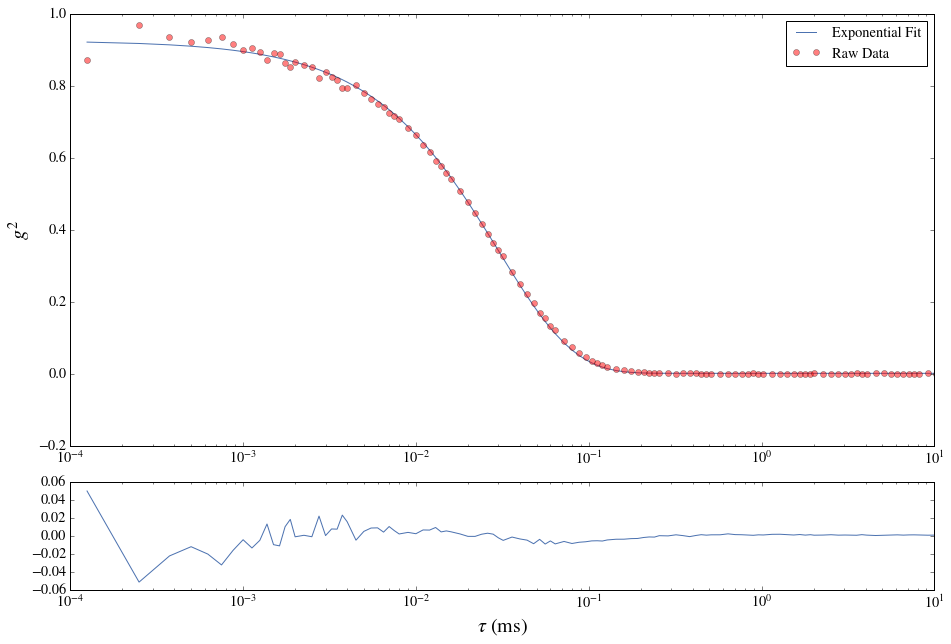

In [9]:
# Fitting data on N(t) = N0*e**(-C*t)
def fitmodel(t, C, constant, B):
    return constant*np.e**(-C*t) + B

popt, pcov = scipy.optimize.curve_fit(fitmodel, tau, intensity_ac)
print ("best-fit parameters: ", popt)
print pcov


plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig1 = plt.figure(figsize = (15, 10))
frame1=fig1.add_axes((.1,.3,.8,.6))

frame1.set_xticklabels([])
plt.semilogx(tau, fitmodel(tau, popt[0], popt[1], popt[2]), label='Exponential Fit')
plt.semilogx(tau, intensity_ac, 'ro', alpha = 0.5, label="Raw Data")
plt.xlim(10**-4, 10)

#plt.title("Single Exponential Decay", fontsize=20)
plt.ylabel(r'$g^2$', fontsize=20)
plt.legend()

# Plot the residuals
frame2=fig1.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt[0], popt[1], popt[2]) - intensity_ac
plt.semilogx(tau, residuals)
plt.xlim(10**-4, 10)
plt.xlabel(r'$\tau $ (ms)', fontsize=20)


For spherical particles in Brownian motion, the autocorrelation functions decays exponentially with tau, given by

*g(tau) = A e^(-D q^2 tau) + B *

where A is the amplitude, B is the baseline, D is the diffusion coefficient and q is the magnitude of the scattering vector.

The magnitude of the scattering vector q is given by *(4 pi n / lambda) sin(theta/2)*

In [10]:
# Determine the diffusion constant D

# Data taken at a scattering angle of 90 degrees with a 632.8 nm HeNe laser.

lam = 632.8e-9 # wavelength in meters
theta = np.pi # scattering angle in radians
n = 1.33200 # refractive index

q = (4*np.pi * n) / (lam) * np.sin(theta/2)

C = popt[0] # exponetial constant from fit
D = (C / q**2) /0.001 # Diffusion constant
print D 

# I have no idea what this is supposed to be?
# Units of m^2/millisec, 


4.74623380035e-11


In [12]:
# To find the radius, use the relationship D = kT/(6*pi*eta*R)

k = 1.38065e-23 # Boltzmann's constant, J/K (joules per kelvin)
T = 297.94999 # Kelvin, from textfile
eta = 8.9e-4 # viscosity of water, Pa s (pascal seconds)
#R = 3e-9 # estimate the radius of the enzyme

R = k*T / (6*np.pi*eta*D)
print R


5.16638438275e-09


In [ ]:
lam = 632.8e-9 # wavelength in meters
theta = 0.261799 # scattering angle in radians
n = 1.33200 # refractive index

q = (4*np.pi * n) / (lam) * np.sin(theta/2)

print q

print D_est*q**2

In [ ]:
Time = 1/(D_est*q**2)
print Time
# About 1 millisecond 

In [13]:
sum_res = sum(residuals**2)
print sum_res

0.011389455507
